In [14]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))


import numpy as np
import matplotlib.pyplot as plt

from polymer.polymer import Polymer
from polymer.config import Config

from numba import njit

/home/jan/Documents/masterthesis/project/mucus
['/home/jan/Documents/masterthesis/project/mucus/test_skripts', '/home/jan/anaconda3/envs/mucus/lib/python310.zip', '/home/jan/anaconda3/envs/mucus/lib/python3.10', '/home/jan/anaconda3/envs/mucus/lib/python3.10/lib-dynload', '', '/home/jan/.local/lib/python3.10/site-packages', '/home/jan/anaconda3/envs/mucus/lib/python3.10/site-packages', '/home/jan/anaconda3/envs/mucus/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg', PosixPath('/home/jan/Documents/masterthesis/project/mucus'), PosixPath('/home/jan/Documents/masterthesis/project/mucus'), PosixPath('/home/jan/Documents/masterthesis/project/mucus'), PosixPath('/home/jan/Documents/masterthesis/project/mucus'), PosixPath('/home/jan/Documents/masterthesis/project/mucus'), '/home/jan/Documents/masterthesis/project/mucus']


In [19]:
def plot_box(positions, l_box):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i in range(len(positions)):
        ax.scatter(positions[i, 0],positions[i, 1], positions[i, 2])
    
    xy = np.array(((0,0),
                    (l_box, 0),
                    (l_box, l_box),
                    (0, l_box),
                    (0,0)), dtype="float64")
    xy -= l_box/2

    ax.plot(xy[:, 0], xy[:, 1], zs=-l_box/2, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box/2, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=-l_box/2, zdir='y', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box/2, zdir='y', c="r")

[[ 4.9  4.9  4.9]
 [ 5.1  5.1  5.1]
 [10.2 10.2 10.2]
 [ 0.   0.   4.9]
 [ 0.   0.  -4.9]]
[[ 4.9  4.9  4.9]
 [-4.9 -4.9 -4.9]
 [ 0.2  0.2  0.2]
 [ 0.   0.   4.9]
 [ 0.   0.  -4.9]]
[[ 0.          0.34641016  9.17986928  6.92964646 12.00249974]
 [ 0.34641016  0.          8.83345912  7.2152616  12.32963909]
 [ 9.17986928  8.83345912  0.         15.36782353 20.88276802]
 [ 6.92964646  7.2152616  15.36782353  0.          9.8       ]
 [12.00249974 12.32963909 20.88276802  9.8         0.        ]]


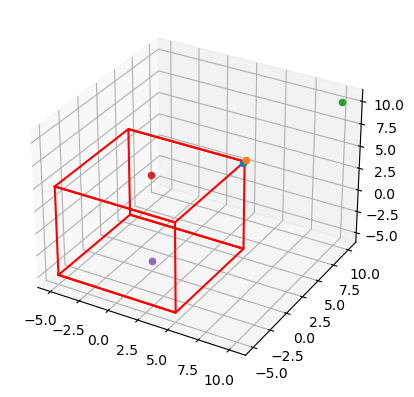

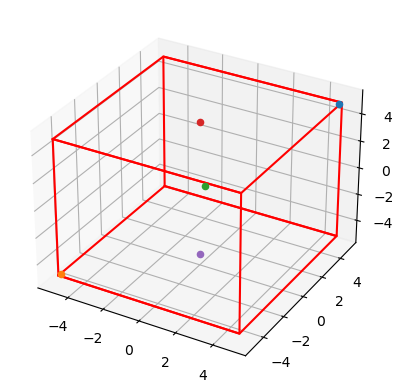

In [29]:
lbox = 10
lbox2 = lbox/2 # half of box length

positions = np.array(((4.9, 4.9, 4.9), (5.1, 5.1, 5.1), (10.2, 10.2, 10.2), (0,0,4.9), (0,0,-4.9)))
#positions = lbox2*np.random.randn(5, 3)
n = len(positions)

plot_box(positions, lbox)

positions_new = positions - np.round(positions/lbox)*lbox

plot_box(positions_new, lbox)

print(positions)
print(positions_new)

def dis_dir_mic(positions, lbox):
    dir = np.zeros((3, n, n))

    for i in range(n-1):
        for j in range(i+1, n):
            d = positions[j] - positions[i]
            dir[:, i, j] = d
            dir[:, j, i] = -d
            
    dis = np.linalg.norm(dir, axis=0)
    return dis, dir

print(dis)
